# Instalar NetCDF
#- gdal
#- rasterio
#- rioxarray
#- basemap

In [4]:
#import the library
import netCDF4 as nc
import numpy as np
#To plot the data
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import xarray as xr
# import rioxarray as rio

In [5]:
dir_esa = 'C:/Users/amgomez/Downloads/esa_lc_maps'

In [6]:
fn=dir_esa+'/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds.nc'

In [7]:
ds=nc.Dataset(fn)

FileNotFoundError: [Errno 2] No such file or directory: b'C:/Users/amgomez/Downloads/esa_lc_maps/ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds.nc'

In [17]:
ds_lc=xr.open_dataset(fn)
ds_lc

MemoryError: Unable to allocate 31.3 GiB for an array with shape (1, 64800, 129600) and data type float32

<xarray.Dataset>
Dimensions:              (time: 1, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 1992-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 ...
    processed_flag       (time, lat, lon) float32 ...
    current_pixel_state  (time, lat, lon) float32 ...
    observation_count    (time, lat, lon) uint16 ...
    change_count         (time, lat, lon) uint8 ...
    crs                  int32 ...
    lat_bounds           (lat, bounds) float64 ...
    lon_bounds           (lon, bounds) float64 ...
    time_bounds          (time, bounds) datetime64[ns] ...
Attributes: (12/38)
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-v2.0.7cds
    title:                      Land Cover Map of ESA CCI brokered by CDS

In [6]:
lons=ds.variables['lon'][:]
lats=ds.variables['lat'][:]
lcs=ds.variables['lccs_class'][:]
cpx=ds.variables['current_pixel_state'][:] #Current pixel state

In [7]:
ds.close()

In [15]:
lcs

masked_array(
  data=[[[210, 210, 210, ..., 210, 210, 210],
         [210, 210, 210, ..., 210, 210, 210],
         [210, 210, 210, ..., 210, 210, 210],
         ...,
         [220, 220, 220, ..., 220, 220, 220],
         [220, 220, 220, ..., 220, 220, 220],
         [210, 210, 210, ..., 210, 210, 210]]],
  mask=False,
  fill_value=999999,
  dtype=uint8)

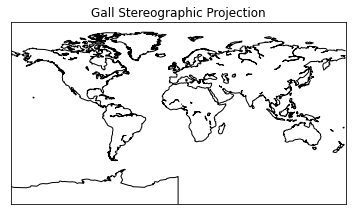

In [12]:
#Example first
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='gall',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
#m.drawmapboundary(fill_color='aqua')
plt.title("Gall Stereographic Projection")
plt.show()